In [64]:
import IPython.display as display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.constraints import max_norm
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import glob

In [30]:
shift = 0.2
IMAGE_SIZE = 224
BATCH_SIZE = 300
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.5,
        zoom_range=0.5,
        horizontal_flip=True,
        rotation_range = 90)

val_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.5,
        zoom_range=0.5,
        horizontal_flip=True,
        rotation_range = 90)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "output/train",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        "output/val",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 16418 images belonging to 120 classes.
Found 2009 images belonging to 120 classes.


In [68]:
img_paths = glob.glob('output/test/n02085936-Maltese_dog/*.jpg')
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02085936', 'Maltese_dog', 0.65957993), ('n02097474', 'Tibetan_terrier', 0.07856042), ('n02113624', 'toy_poodle', 0.07116889)]
Predicted: [('n02085936', 'Maltese_dog', 0.9407695), ('n02098413', 'Lhasa', 0.057072826), ('n02097474', 'Tibetan_terrier', 0.0015726106)]
Predicted: [('n02085936', 'Maltese_dog', 0.9936731), ('n02113624', 'toy_poodle', 0.0044965916), ('n02098413', 'Lhasa', 0.001171993)]
Predicted: [('n02085936', 'Maltese_dog', 0.892803), ('n02098413', 'Lhasa', 0.058563646), ('n02086240', 'Shih-Tzu', 0.015526939)]
Predicted: [('n02085936', 'Maltese_dog', 0.96616167), ('n02086240', 'Shih-Tzu', 0.0141171375), ('n02098413', 'Lhasa', 0.010279941)]
Predicted: [('n02085936', 'Maltese_dog', 0.57148445), ('n02098413', 'Lhasa', 0.34505647), ('n02086240', 'Shih-Tzu', 0.0381302)]
Predicted: [('n02085936', 'Maltese_dog', 0.9831993), ('n02098413', 'Lhasa', 0.006142203), ('n02096437', 'Dandie_Dinmont', 0.0018037976)]
Predicted: [('n02085936', 'Maltese_dog', 0.9220808), ('n020964

In [59]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02085936', 'Maltese_dog', 0.90088475), ('n02098286', 'West_Highland_white_terrier', 0.04055108), ('n02113624', 'toy_poodle', 0.018566204)]


Epoch 1/2
10/10 [==============================] - 45s 4s/step - loss: 0.1490 - accuracy: 0.9285 - val_loss: 0.2173 - val_accuracy: 0.9917
Epoch 2/2
10/10 [==============================] - 44s 4s/step - loss: 0.0580 - accuracy: 0.9917 - val_loss: 0.1270 - val_accuracy: 0.9917


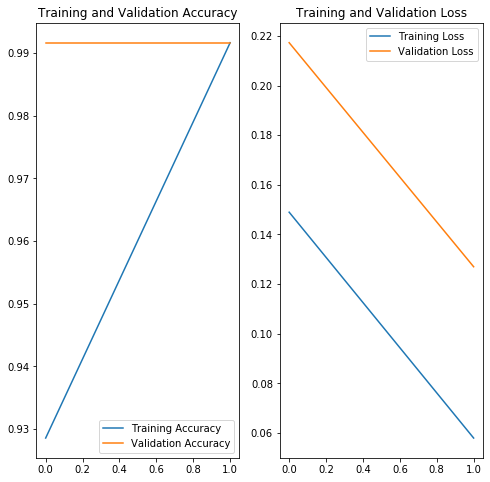

Found 2153 images belonging to 120 classes.
430/430 [==============================] - 79s 184ms/step
[23 23 23 ... 23 23 23]
